# Pobranie danych z bazy

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


con = sqlite3.connect("game_database.db")
cur = con.cursor()

c:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
sql_query = """
SELECT game.*, d.difficulty_level FROM game
JOIN difficulties d ON (game.game_id = d.game_id) AND d.player_z = 0 
WHERE player_satisfaction != -1 AND boredom != -1 AND challenge != -1
   AND playing_time BETWEEN 10 AND 1000;
"""

df = pd.read_sql_query(sql_query, con)
print(df.head())
# shape
print(df.shape)

   game_id  score  player_satisfaction  playing_time  boredom  challenge  \
0        7   5741                    3     24.807064        2          3   
1       10   2243                    2     10.794063        2          2   
2       11   2746                    4     12.985625        1          5   
3       12   4492                    4     21.237518        2          4   
4       14   4949                    3     21.545864        1          5   

  change_difficulty                                          player_id  \
0          emotions  1a96bd2f405ef1f62b0247bdf38aceb0a7ec773f43995a...   
1            random  1a96bd2f405ef1f62b0247bdf38aceb0a7ec773f43995a...   
2          emotions  0be167865a4b3476b716dd42a05255f7f30e9b89c17d45...   
3            random  1a96bd2f405ef1f62b0247bdf38aceb0a7ec773f43995a...   
4            faster  0be167865a4b3476b716dd42a05255f7f30e9b89c17d45...   

   difficulty_level  
0                 3  
1                 3  
2                 3  
3         

In [4]:
# aggregate size, mean satisfaction, mean boredom, mean challenge
print(df.groupby('change_difficulty').agg({
    'game_id': 'size',
    'player_satisfaction': 'mean',
    'boredom': 'mean',
    'challenge': 'mean'
}))


                   game_id  player_satisfaction   boredom  challenge
change_difficulty                                                   
emotions                52             3.326923  1.923077   3.519231
faster                  32             3.000000  1.593750   3.593750
no                      35             3.171429  1.971429   3.371429
random                  30             3.066667  1.900000   3.666667


In [14]:
# Rozgrywki powyżej 120 sekund to 5 gier na poziomie 1 z satysfakcją 5 cztery razy oraz jedną 3 (140 sekund)
df.loc[df['playing_time']>120, :]

,game_id,score,player_satisfaction,playing_time,difficulty_level
48,130,23242,5,120.605560,1
89,203,97491,5,499.357099,1
93,229,28496,3,142.447654,1
149,317,100992,5,522.119535,1
160,329,78447,5,393.112058,1


In [3]:
df[(df['playing_time'] >= 10) & (df['playing_time'] <= 120)]

,game_id,score,player_satisfaction,playing_time,difficulty_level
0,59,7501,4,27.850465,2
1,60,15788,5,81.156830,1
2,61,5890,5,22.403121,2
3,62,13440,5,39.971035,3
4,64,12741,2,66.330811,1
...,...,...,...,...,...
169,341,18747,5,69.694061,2
170,342,9891,4,39.343614,2
171,343,5148,5,19.689912,2
172,344,5647,3,21.075505,2


# Wykresy

## Wszystkie dane

c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


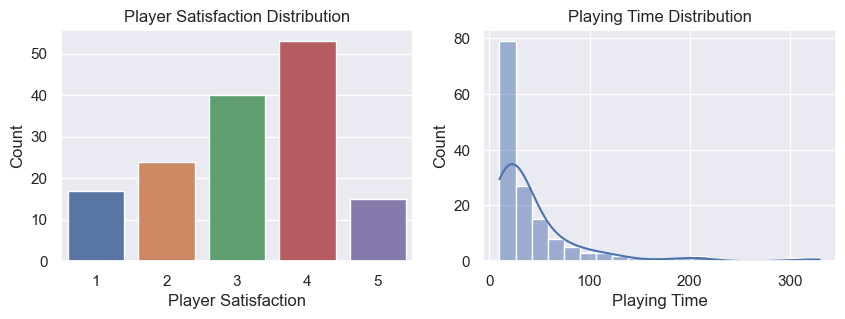

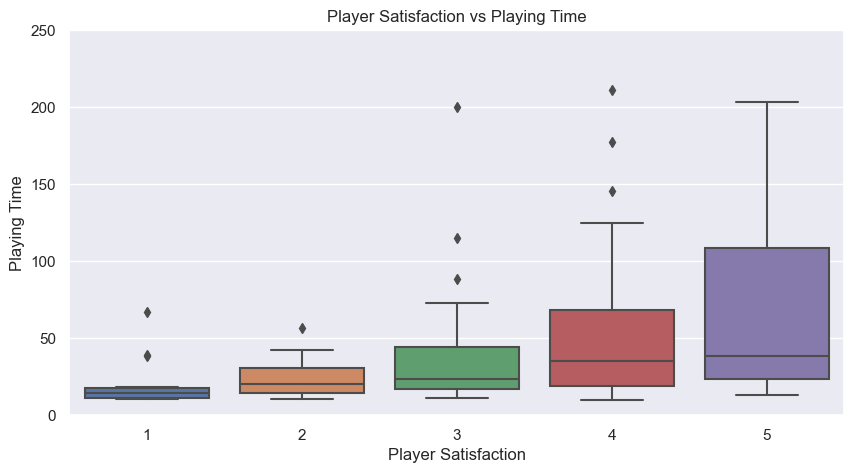

In [11]:
# Plot player satisfaction and playing_time distribution

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.countplot(x='player_satisfaction', data=df, ax=ax[0])
# sns.histplot(df['player_satisfaction'], bins=20, kde=True)
ax[0].set_title('Player Satisfaction Distribution')
ax[0].set_xlabel('Player Satisfaction')
ax[0].set_ylabel('Count')

sns.histplot(df['playing_time'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Playing Time Distribution')
ax[1].set_xlabel('Playing Time')
ax[1].set_ylabel('Count')

plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='player_satisfaction', y='playing_time', data=df)
plt.title('Player Satisfaction vs Playing Time')
plt.xlabel('Player Satisfaction')
plt.ylabel('Playing Time')
plt.ylim(0, 250)
plt.show()


## Time [10, 120] sec

c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


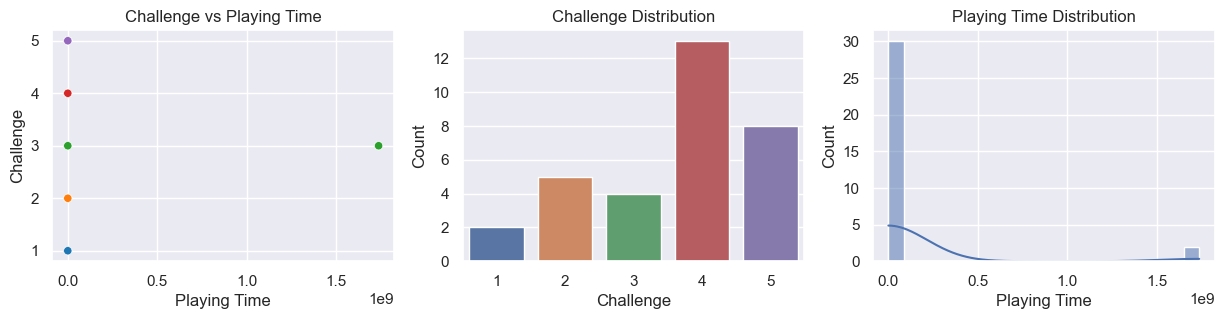

In [5]:
# plot satisfaction for playing time between 10 and 60
# df_plot = df[(df['playing_time'] >= 10) & (df['playing_time'] <= 120)]
df_plot = df.copy()
df_plot = df_plot[df_plot['change_difficulty'] == 'random']

feature = 'challenge'

fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.scatterplot(x='playing_time', y=feature, data=df_plot, ax=ax[0], hue=feature, palette="tab10")
ax[0].set_title(f'{feature.capitalize()} vs Playing Time')
ax[0].set_xlabel('Playing Time')
ax[0].set_ylabel(feature.capitalize())
# remove legend
ax[0].get_legend().remove()

sns.countplot(x=feature, data=df_plot, ax=ax[1])
ax[1].set_title(f'{feature.capitalize()} Distribution')
ax[1].set_xlabel(feature.capitalize())
ax[1].set_ylabel('Count')

sns.histplot(df_plot['playing_time'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Playing Time Distribution')
ax[2].set_xlabel('Playing Time')
ax[2].set_ylabel('Count')
plt.show()

## Testy

In [3]:
palette = sns.color_palette()
colors_dict = { 'no change': palette[0],
                'random': palette[1],
                'faster': palette[2],
                'emotions': palette[3]}

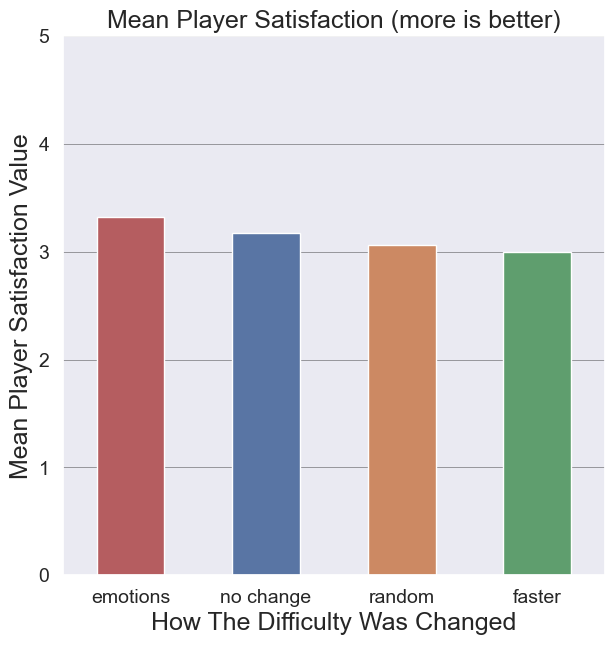

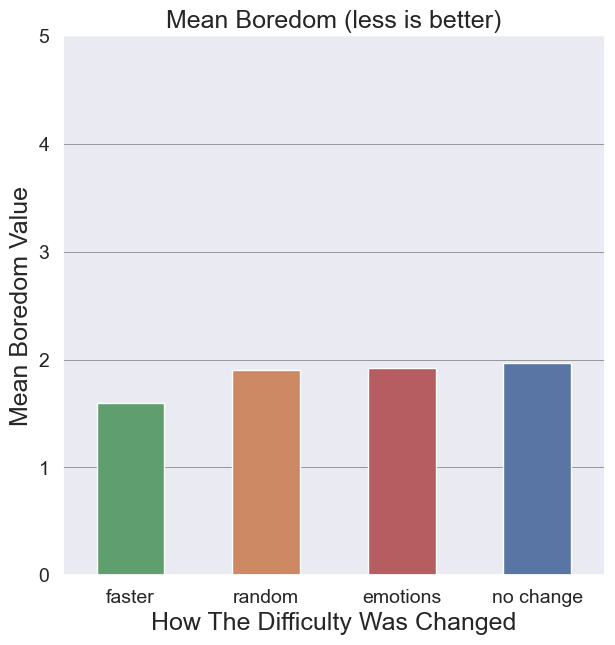

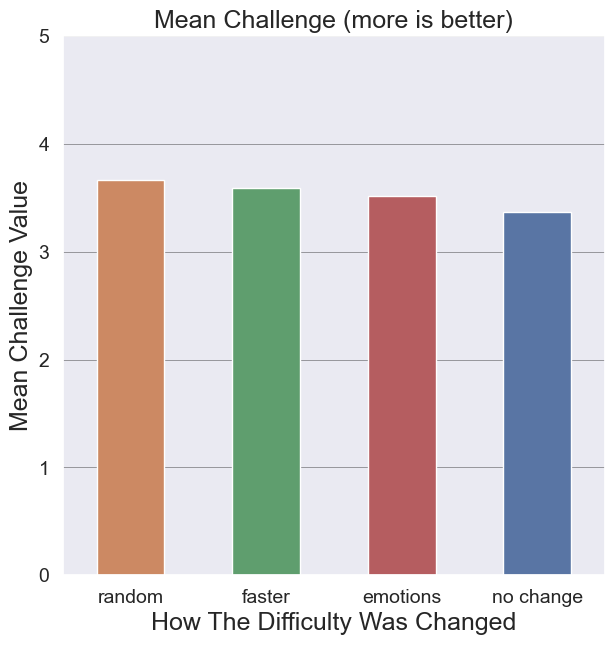

In [26]:
# Średnie wartości satysfakcji dla różnych modyfikacji trudności

df_plot = df.copy()

# rename no to no change
df_plot['change_difficulty'] = df_plot['change_difficulty'].replace('no', 'no change')

# Mean Player Satisfaction
plt.figure(figsize=(7, 7))
means_satisfaction = df_plot.groupby('change_difficulty')['player_satisfaction'].mean().sort_values(ascending=False)
sns.barplot(x=means_satisfaction.index, y=means_satisfaction.values, width=0.5, palette=colors_dict)
plt.title('Mean Player Satisfaction (more is better)', fontsize=18)
plt.xlabel('How The Difficulty Was Changed', fontsize=18)
plt.ylabel('Mean Player Satisfaction Value', fontsize=18)
plt.grid(axis='y', color='black', linestyle='-', linewidth=0.5, alpha=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 5)
plt.show()

# Mean Boredom
plt.figure(figsize=(7, 7))
means_boredom = df_plot.groupby('change_difficulty')['boredom'].mean().sort_values()
sns.barplot(x=means_boredom.index, y=means_boredom.values, width=0.5, palette=colors_dict)
plt.title('Mean Boredom (less is better)', fontsize=18)
plt.xlabel('How The Difficulty Was Changed', fontsize=18)
plt.ylabel('Mean Boredom Value', fontsize=18)
plt.grid(axis='y', color='black', linestyle='-', linewidth=0.5, alpha=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 5)
plt.show()

# Mean Challenge
plt.figure(figsize=(7, 7))
means_challenge = df_plot.groupby('change_difficulty')['challenge'].mean().sort_values(ascending=False)
sns.barplot(x=means_challenge.index, y=means_challenge.values, width=0.5, palette=colors_dict)
plt.title('Mean Challenge (more is better)', fontsize=18)
plt.xlabel('How The Difficulty Was Changed', fontsize=18)
plt.ylabel('Mean Challenge Value', fontsize=18)
plt.grid(axis='y', color='black', linestyle='-', linewidth=0.5, alpha=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 5)
plt.show()


In [3]:
from scipy.stats import ttest_ind_from_stats, shapiro
# ttest_rel

dane_1 = df[df['change_difficulty'] == 'emotions']['player_satisfaction']


print("Shapiro-Wilk test for emotions:")
print("-----------------")
for change in df['change_difficulty'].unique():
    dane = df[df['change_difficulty'] == change]['player_satisfaction']
    stat, p_value = shapiro(dane)
    print(f"Statystyka dla {change}:", stat)
    print(f"Wartość p dla {change}:", p_value)

    if p_value > 0.05:
        print(f"Nie można odrzucić H0 dla {change}: Dane są w przybliżeniu normalne.")
    else:
        print(f"Odrzucamy H0 dla {change}: Dane nie są normalne.")
    print("\n")
    
print("\n\nMean comparasion")
print("-----------------")

for change in df['change_difficulty'].unique():
    dane = df[df['change_difficulty'] == change]['player_satisfaction']
    print(f"Mean for {change}:", dane.mean())
    stat, p_value = ttest_ind_from_stats(
                                        mean1=dane.mean(), std1=dane.std(), nobs1=len(dane),
                                        mean2=dane_1.mean(), std2=dane_1.std(), nobs2=len(dane_1),
                                        # alternative='greater'
                                        )
    print(f"Statystyka dla {change}:", stat)
    print(f"Wartość p dla {change}:", p_value)
    
    if p_value > 0.05:
        print(f"Nie można odrzucić H0 dla {change}: Średnie są równe.")
    else:
        print(f"Odrzucamy H0 dla {change}: Średnie nie są równe.")

    print("\n")

Shapiro-Wilk test for emotions:
-----------------
Statystyka dla emotions: 0.863497257232666
Wartość p dla emotions: 2.6653267923393287e-05
Odrzucamy H0 dla emotions: Dane nie są normalne.


Statystyka dla random: 0.8919262290000916
Wartość p dla random: 0.0053605386056005955
Odrzucamy H0 dla random: Dane nie są normalne.


Statystyka dla faster: 0.9160569310188293
Wartość p dla faster: 0.016275504603981972
Odrzucamy H0 dla faster: Dane nie są normalne.


Statystyka dla no: 0.8782750368118286
Wartość p dla no: 0.0010834812419489026
Odrzucamy H0 dla no: Dane nie są normalne.




Mean comparasion
-----------------
Mean for emotions: 3.326923076923077
Statystyka dla emotions: 0.0
Wartość p dla emotions: 1.0
Nie można odrzucić H0 dla emotions: Średnie są równe.


Mean for random: 3.066666666666667
Statystyka dla random: -1.0188436743106777
Wartość p dla random: 0.31134850219763804
Nie można odrzucić H0 dla random: Średnie są równe.


Mean for faster: 3.0
Statystyka dla faster: -1.377894393

In [32]:
from scipy.stats import ttest_ind_from_stats, shapiro
# ttest_rel

dane_1 = df[df['change_difficulty'] == 'emotions']['boredom']


print("Shapiro-Wilk test for emotions:")
print("-----------------")
for change in df['change_difficulty'].unique():
    dane = df[df['change_difficulty'] == change]['boredom']
    stat, p_value = shapiro(dane)
    print(f"Statystyka dla {change}:", stat)
    print(f"Wartość p dla {change}:", p_value)

    if p_value > 0.05:
        print(f"Nie można odrzucić H0 dla {change}: Dane są w przybliżeniu normalne.")
    else:
        print(f"Odrzucamy H0 dla {change}: Dane nie są normalne.")
    print("\n")
    
print("\n\nMean comparasion")
print("-----------------")

for change in df['change_difficulty'].unique():
    dane = df[df['change_difficulty'] == change]['boredom']
    print(f"Mean for {change}:", dane.mean())
    stat, p_value = ttest_ind_from_stats(
                                        mean1=dane.mean(), std1=dane.std(), nobs1=len(dane),
                                        mean2=dane_1.mean(), std2=dane_1.std(), nobs2=len(dane_1),
                                        equal_var=False
                                        # alternative='greater'
                                        )
    print(f"Statystyka dla {change}:", stat)
    print(f"Wartość p dla {change}:", p_value)
    
    if p_value > 0.05:
        print(f"Nie można odrzucić H0 dla {change}: Średnie są równe.")
    else:
        print(f"Odrzucamy H0 dla {change}: Średnie nie są równe.")

    print("\n")

Shapiro-Wilk test for emotions:
-----------------
Statystyka dla emotions: 0.7902867794036865
Wartość p dla emotions: 3.5520571373126586e-07
Odrzucamy H0 dla emotions: Dane nie są normalne.


Statystyka dla random: 0.6986552476882935
Wartość p dla random: 1.491554257881944e-06
Odrzucamy H0 dla random: Dane nie są normalne.


Statystyka dla faster: 0.7230819463729858
Wartość p dla faster: 1.961322368515539e-06
Odrzucamy H0 dla faster: Dane nie są normalne.


Statystyka dla no: 0.7941530346870422
Wartość p dla no: 1.5703511962783523e-05
Odrzucamy H0 dla no: Dane nie są normalne.




Mean comparasion
-----------------
Mean for emotions: 1.9230769230769231
Statystyka dla emotions: 0.0
Wartość p dla emotions: 1.0
Nie można odrzucić H0 dla emotions: Średnie są równe.


Mean for random: 1.9
Statystyka dla random: -0.0957571105210769
Wartość p dla random: 0.9239529456005177
Nie można odrzucić H0 dla random: Średnie są równe.


Mean for faster: 1.59375
Statystyka dla faster: -1.751755164957862


In [33]:
from scipy.stats import ttest_ind_from_stats, shapiro
# ttest_rel

dane_1 = df[df['change_difficulty'] == 'emotions']['challenge']


print("Shapiro-Wilk test for emotions:")
print("-----------------")
for change in df['change_difficulty'].unique():
    dane = df[df['change_difficulty'] == change]['challenge']
    stat, p_value = shapiro(dane)
    print(f"Statystyka dla {change}:", stat)
    print(f"Wartość p dla {change}:", p_value)

    if p_value > 0.05:
        print(f"Nie można odrzucić H0 dla {change}: Dane są w przybliżeniu normalne.")
    else:
        print(f"Odrzucamy H0 dla {change}: Dane nie są normalne.")
    print("\n")
    
print("\n\nMean comparasion")
print("-----------------")

for change in df['change_difficulty'].unique():
    dane = df[df['change_difficulty'] == change]['challenge']
    print(f"Mean for {change}:", dane.mean())
    stat, p_value = ttest_ind_from_stats(
                                        mean1=dane.mean(), std1=dane.std(), nobs1=len(dane),
                                        mean2=dane_1.mean(), std2=dane_1.std(), nobs2=len(dane_1),
                                        # alternative='greater'
                                        )
    print(f"Statystyka dla {change}:", stat)
    print(f"Wartość p dla {change}:", p_value)
    
    if p_value > 0.05:
        print(f"Nie można odrzucić H0 dla {change}: Średnie są równe.")
    else:
        print(f"Odrzucamy H0 dla {change}: Średnie nie są równe.")

    print("\n")

Shapiro-Wilk test for emotions:
-----------------
Statystyka dla emotions: 0.8841327428817749
Wartość p dla emotions: 0.00011199885921087116
Odrzucamy H0 dla emotions: Dane nie są normalne.


Statystyka dla random: 0.8349372744560242
Wartość p dla random: 0.0003047382924705744
Odrzucamy H0 dla random: Dane nie są normalne.


Statystyka dla faster: 0.8895059823989868
Wartość p dla faster: 0.00338342715986073
Odrzucamy H0 dla faster: Dane nie są normalne.


Statystyka dla no: 0.9121167659759521
Wartość p dla no: 0.008508352562785149
Odrzucamy H0 dla no: Dane nie są normalne.




Mean comparasion
-----------------
Mean for emotions: 3.519230769230769
Statystyka dla emotions: 0.0
Wartość p dla emotions: 1.0
Nie można odrzucić H0 dla emotions: Średnie są równe.


Mean for random: 3.6666666666666665
Statystyka dla random: 0.5943683274334529
Wartość p dla random: 0.5539430060993311
Nie można odrzucić H0 dla random: Średnie są równe.


Mean for faster: 3.59375
Statystyka dla faster: 0.32634114

## Time [0,10] sec

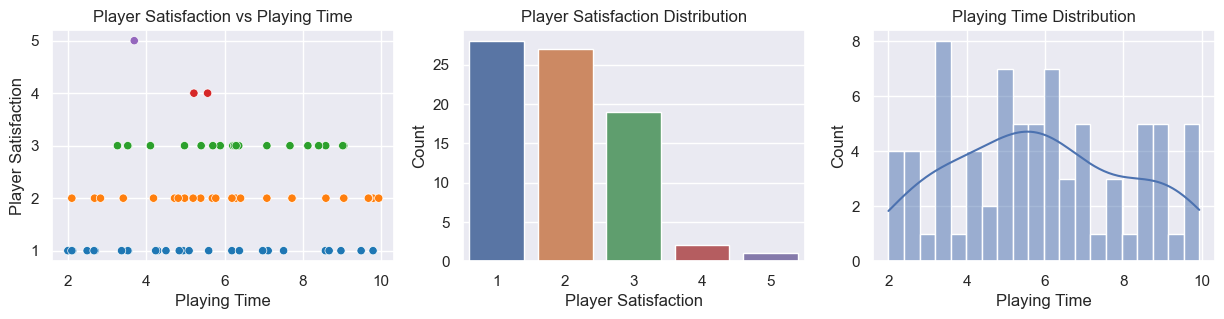

In [50]:
# plot satisfaction for playing time between 0 and 10
df_plot = df[(df['playing_time'] <= 10)]


fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.scatterplot(x='playing_time', y='player_satisfaction', data=df_plot, ax=ax[0], hue='player_satisfaction', palette="tab10")
ax[0].set_title('Player Satisfaction vs Playing Time')
ax[0].set_xlabel('Playing Time')
ax[0].set_ylabel('Player Satisfaction')
# remove legend
ax[0].get_legend().remove()

sns.countplot(x='player_satisfaction', data=df_plot, ax=ax[1])
ax[1].set_title('Player Satisfaction Distribution')
ax[1].set_xlabel('Player Satisfaction')
ax[1].set_ylabel('Count')

sns.histplot(df_plot['playing_time'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Playing Time Distribution')
ax[2].set_xlabel('Playing Time')
ax[2].set_ylabel('Count')
plt.show()

## Satisfaction $\geq$ 4

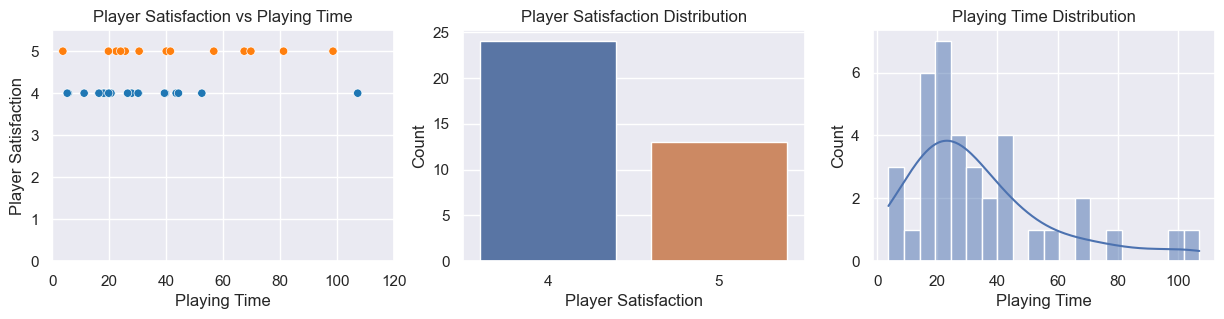

In [52]:
df_plot = df[(df['player_satisfaction'] >= 4)]

fig, ax = plt.subplots(1,3,figsize=(15, 3))
sns.scatterplot(x='playing_time', y='player_satisfaction', data=df_plot, ax=ax[0], hue='player_satisfaction', palette="tab10")
ax[0].set_title('Player Satisfaction vs Playing Time')
ax[0].set_xlabel('Playing Time')
ax[0].set_ylabel('Player Satisfaction')
ax[0].set_xlim(0, 120)
ax[0].set_ylim(0, 5.5)
ax[0].get_legend().remove()

sns.countplot(x='player_satisfaction', data=df_plot, ax=ax[1])
ax[1].set_title('Player Satisfaction Distribution')
ax[1].set_xlabel('Player Satisfaction')
ax[1].set_ylabel('Count')

sns.histplot(df_plot['playing_time'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Playing Time Distribution')
ax[2].set_xlabel('Playing Time')
ax[2].set_ylabel('Count')
plt.show()

## Difficulty

Average Player Satisfaction for Difficulty Level 1: 2.6
Average Player Satisfaction for Difficulty Level 2: 3.0789473684210527
Average Player Satisfaction for Difficulty Level 3: 3.3513513513513513


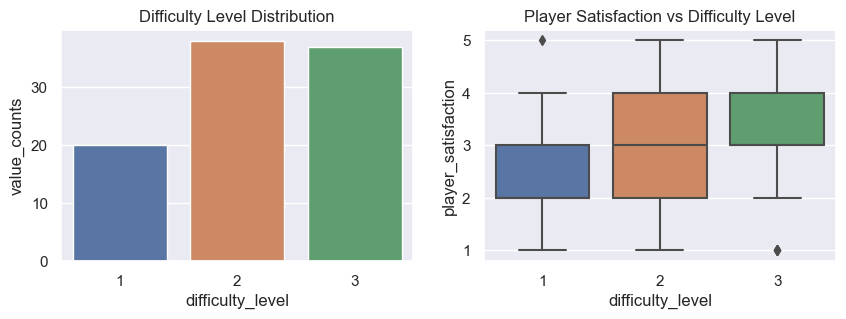

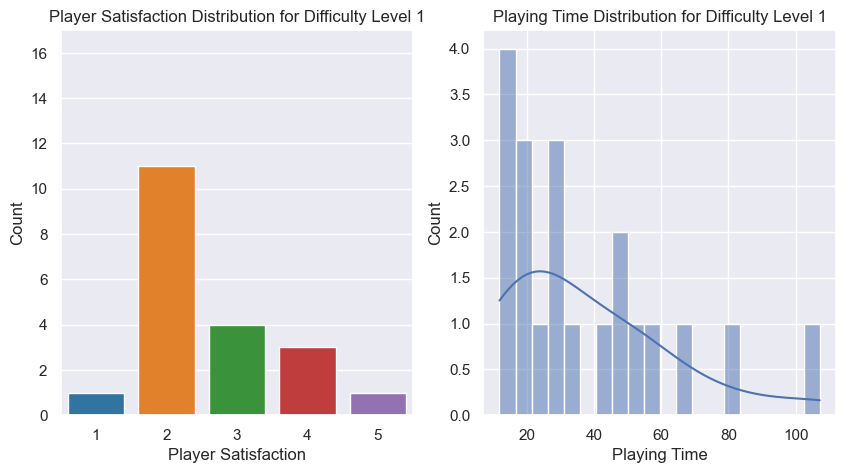

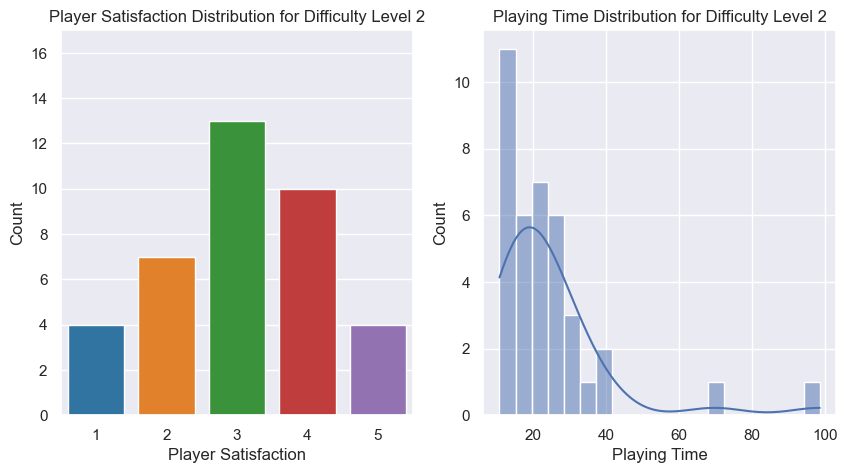

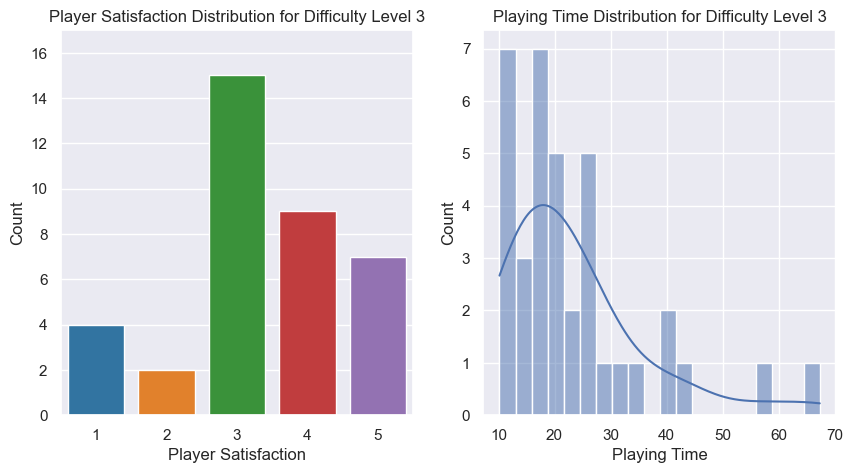

In [66]:
# plot difficulty level distribution and player satisfaction

df = df[df['playing_time'] >= 10]

# count the number of games for each difficulty level
df['value_counts'] = df['difficulty_level'].map(df['difficulty_level'].value_counts())

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.barplot(x='difficulty_level', y='value_counts', data=df, ax=ax[0])
# sns.histplot(df['difficulty_level'], bins=7, ax=ax[0])
ax[0].set_title('Difficulty Level Distribution')

sns.boxplot(x='difficulty_level', y='player_satisfaction', data=df, ax=ax[1])
ax[1].set_title('Player Satisfaction vs Difficulty Level')


# plot player satiscation and playing time distribution for each difficulty level

max_count = df.groupby(['player_satisfaction','difficulty_level']).size().max()

for difficulty_level in df['difficulty_level'].unique():
    df_plot = df[df['difficulty_level'] == difficulty_level]

    # print average player satisfaction
    print(f'Average Player Satisfaction for Difficulty Level {difficulty_level}: {df_plot["player_satisfaction"].mean()}')

    # fig, ax = plt.subplots(1, 2, figsize=(5, 3))
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.countplot(x='player_satisfaction', data=df_plot, ax=ax[0], palette="tab10")
    ax[0].set_title(f'Player Satisfaction Distribution for Difficulty Level {difficulty_level}')
    ax[0].set_xlabel('Player Satisfaction')
    ax[0].set_ylabel('Count')
    ax[0].set_ylim(0, max_count + 2)
    ax[0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    sns.histplot(df_plot['playing_time'], bins=20, kde=True, ax=ax[1])
    ax[1].set_title(f'Playing Time Distribution for Difficulty Level {difficulty_level}')
    ax[1].set_xlabel('Playing Time')
    ax[1].set_ylabel('Count')
    

plt.show()

## Maps played

## Keys Pressed

In [26]:
sql_query = """
SELECT *, g.game_id as game_idd FROM game g
LEFT JOIN difficulties d ON (g.game_id = d.game_id) AND (g.game_id NOT IN (SELECT d2.game_id FROM difficulties d2 GROUP BY d2.game_id HAVING COUNT(*) > 1))
JOIN KeysPressed kp ON (g.game_id = kp.game_id)"""

df = pd.read_sql_query(sql_query, con)
df = df.drop(columns=['game_id'])
print(df.head())
print(df.columns)

   score  player_satisfaction  playing_time  difficulty_level key_type  \
0   2699                   -1      9.776133               2.0        d   
1   2699                   -1      9.776133               2.0     d up   
2   2699                   -1      9.776133               2.0        d   
3   2699                   -1      9.776133               2.0     d up   
4   2699                   -1      9.776133               2.0        a   

     player_z  game_idd  
0  348.317902        58  
1  403.434998        58  
2  467.686798        58  
3  499.670715        58  
4  554.596375        58  
Index(['score', 'player_satisfaction', 'playing_time', 'difficulty_level',
       'key_type', 'player_z', 'game_idd'],
      dtype='object')


In [32]:
# Count the number of keys pressed for each game
# df_plot = df.groupby(['game_id','key_type']).size().reset_index(name='count')
df_plot = df.groupby(['game_idd','key_type']).size().reset_index(name='count')

# pivot keys_type to columns
df_plot = df_plot.pivot(index='game_idd', columns='key_type', values='count').fillna(0)
# drop every column with name containing 'up'
df_plot = df_plot.loc[:, ~df_plot.columns.str.contains('up')]
# drop column 'w'
df_plot = df_plot.drop(columns=['w'])

print(df_plot.head())

key_type     a     d    s  space
game_idd                        
58         2.0   3.0  2.0    1.0
59        10.0  11.0  4.0    8.0
60        25.0  28.0  4.0   15.0
61         2.0   3.0  2.0    2.0
62        10.0   9.0  4.0    3.0


c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

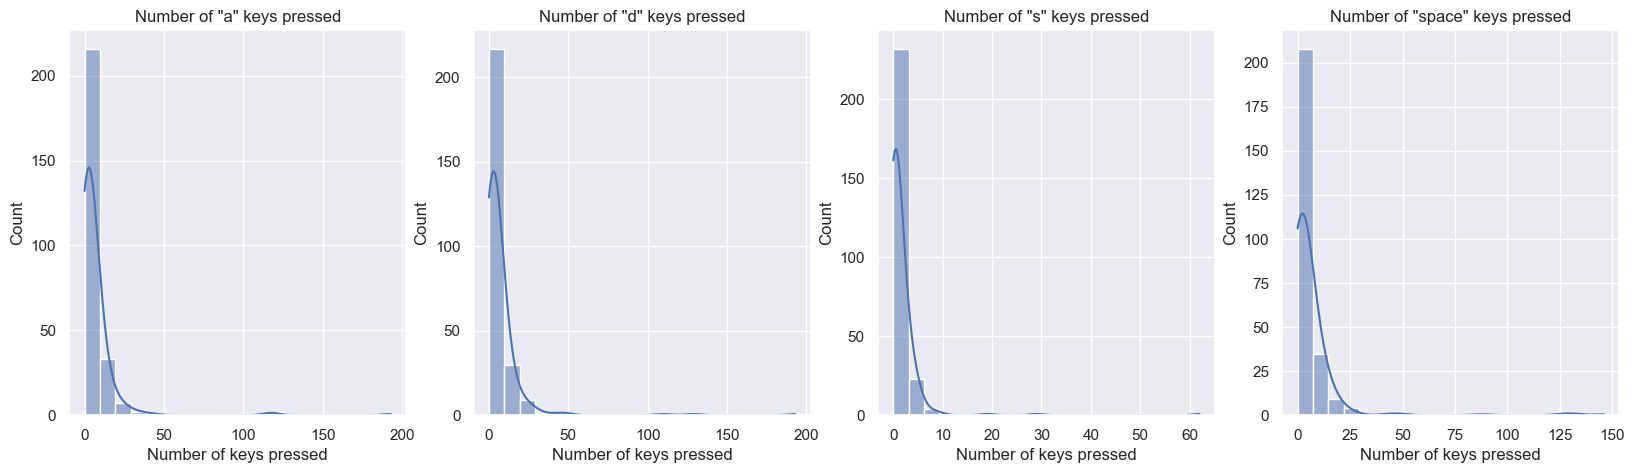

In [34]:
# plot the number of keys pressed for each game
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, column in enumerate(df_plot.columns):
    # sns.boxplot(x=column, data=df_plot, ax=ax[i])
    sns.histplot(df_plot[column], bins=20, kde=True, ax=ax[i])
    ax[i].set_title(f'Number of "{column}" keys pressed')
    ax[i].set_xlabel('Number of keys pressed')
    ax[i].set_ylabel('Count')
